# Active Learning with cross validation for dataset 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import pipeline, preprocessing

%load_ext autoreload
%autoreload 2
from methods import*

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Reading the dataset
First we need to read in the dataframe where we categorize the target in numbers and get the input features and labels

In [1]:
#read in dataframe
data = pd.read_csv('dataset_1.csv')

#define the target and categorize it in numbers
target = 'PROFILE'
profile_options = np.unique(data['PROFILE'])
for index, profile in enumerate(profile_options):
    data.loc[data['PROFILE'] == profile,'PROFILE'] = index

#then get your input features and labels
X = np.array(data.drop(target, axis=1).values.tolist())
y_true = np.array(data[target]).astype('int')

NameError: name 'pd' is not defined

### Decision Tree

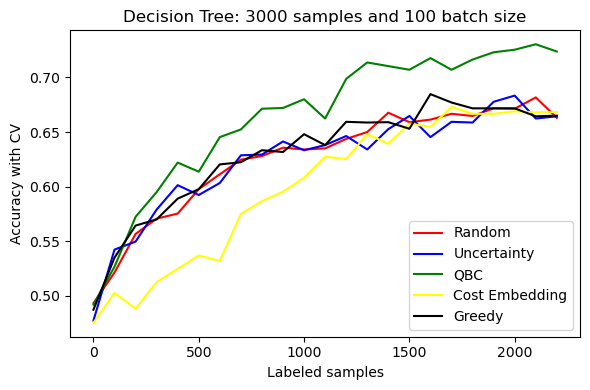

In [4]:
clf_name = 'Decision Tree: 3000 samples and 100 batch size'
# n_samples * batch_size can be maximal 4/5*(total size dataset) - batch_size if there is 5 fold cross validation
n_samples = 23
batch_size = 100
folds = 5
colors = ['blue', 'red', 'green']

fig, ax = plt.subplots(figsize=(6, 4))

clf = SklearnClassifier(DecisionTreeClassifier(criterion = 'entropy'), classes=np.unique(y_true))
cycle11, accuracies11 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_RandomSampling, n_samples, batch_size, clf)
ax.plot(cycle11, accuracies11, color = 'red', label = 'Random')

clf = SklearnClassifier(DecisionTreeClassifier(criterion = 'entropy'), classes=np.unique(y_true))
cycle21, accuracies21 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_UncertaintySampling, n_samples, batch_size, clf)
ax.plot(cycle21, accuracies21, color = 'blue', label = 'Uncertainty')

clf = SklearnClassifier(DecisionTreeClassifier(criterion = 'entropy'), classes=np.unique(y_true))
cycle31, accuracies31 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_QueryByCommittee, n_samples, batch_size, clf)
ax.plot(cycle31, accuracies31, color = 'green', label = 'QBC')

clf = SklearnClassifier(DecisionTreeClassifier(criterion = 'entropy'), classes=np.unique(y_true))
cycle41, accuracies41 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_CostEmbeddingAL, n_samples, batch_size, clf)
ax.plot(cycle41, accuracies41, color = 'yellow', label = 'Cost Embedding')

clf = SklearnClassifier(DecisionTreeClassifier(criterion = 'entropy'), classes=np.unique(y_true))
cycle51, accuracies51 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_GreedySamplingX, n_samples, batch_size, clf)
ax.plot(cycle51, accuracies51, color = 'black', label = 'Greedy')

ax.set(xlabel='Labeled samples', ylabel='Accuracy with CV', title=clf_name)
ax.legend()
plt.tight_layout()
plt.show()

In [7]:
# kolommen wegschrijven naar een file om deze bij te kunnen houden en ook achteraf te kunnen plotten.
f = open('dt_3000_100.txt', 'w')
for i, cycle in enumerate(cycle11):
    f.write(str(cycle) + ' ' + str(accuracies11[i]) + ' ' + str(accuracies21[i]) + ' ' + str(accuracies31[i]) + ' ' + str(accuracies41[i]) + ' ' + str(accuracies51[i]) + '\n')
f.close()

### SVM

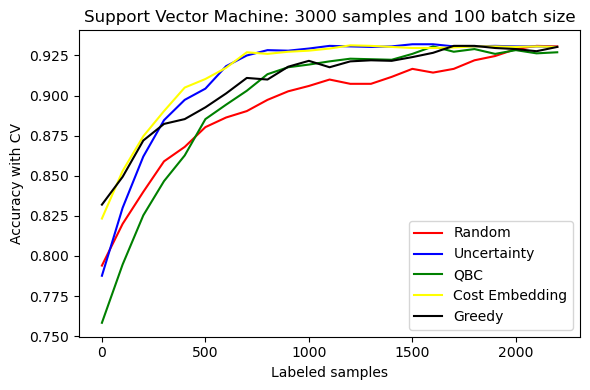

In [13]:
clf_name = 'Support Vector Machine: 3000 samples and 100 batch size'
n_samples = 23
batch_size = 100
folds = 5
colors = ['blue', 'red', 'green']

fig, ax = plt.subplots(figsize=(6, 4))

clf = SklearnClassifier(SVC(kernel = 'rbf', C = 10, probability = True), classes=np.unique(y_true))
cycle12, accuracies12 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_RandomSampling, n_samples, batch_size, clf)
ax.plot(cycle12, accuracies12, color = 'red', label = 'Random')

clf = SklearnClassifier(SVC(kernel = 'rbf', C = 10, probability = True), classes=np.unique(y_true))
cycle22, accuracies22 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_UncertaintySampling, n_samples, batch_size, clf)
ax.plot(cycle22, accuracies22, color = 'blue', label = 'Uncertainty')

clf = SklearnClassifier(SVC(kernel = 'rbf', C = 10, probability = True), classes=np.unique(y_true))
cycle32, accuracies32 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_QueryByCommittee, n_samples, batch_size, clf)
ax.plot(cycle32, accuracies32, color = 'green', label = 'QBC')

clf = SklearnClassifier(SVC(kernel = 'rbf', C = 10, probability = True), classes=np.unique(y_true))
cycle42, accuracies42 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_CostEmbeddingAL, n_samples, batch_size, clf)
ax.plot(cycle42, accuracies42, color = 'yellow', label = 'Cost Embedding')

clf = SklearnClassifier(SVC(kernel = 'rbf', C = 10, probability = True), classes=np.unique(y_true))
cycle52, accuracies52 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_GreedySamplingX, n_samples, batch_size, clf)
ax.plot(cycle52, accuracies52, color = 'black', label = 'Greedy')

ax.set(xlabel='Labeled samples', ylabel='Accuracy with CV', title=clf_name)
ax.legend()
plt.tight_layout()
plt.show()

In [14]:
# kolommen wegschrijven naar een file om deze bij te kunnen houden en ook achteraf te kunnen plotten.
f = open('svm_3000_100.txt', 'w')
for i, cycle in enumerate(cycle12):
    f.write(str(cycle) + ' ' + str(accuracies12[i]) + ' ' + str(accuracies22[i]) + ' ' + str(accuracies32[i]) + ' ' + str(accuracies42[i]) + ' ' + str(accuracies52[i]) + '\n')
f.close()

### Logistic Regression

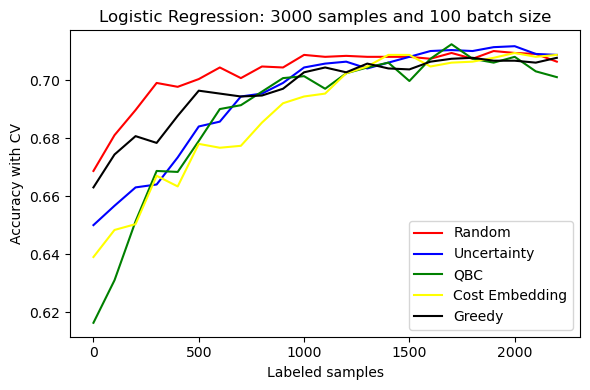

In [15]:
clf_name = 'Logistic Regression: 3000 samples and 100 batch size'
n_samples = 23
batch_size = 100
folds = 5
colors = ['blue', 'red', 'green']

fig, ax = plt.subplots(figsize=(6, 4))

clf = SklearnClassifier(LogisticRegression(), classes=np.unique(y_true))
cycle13, accuracies13 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_RandomSampling, n_samples, batch_size, clf)
ax.plot(cycle13, accuracies13, color = 'red', label = 'Random')

clf = SklearnClassifier(LogisticRegression(), classes=np.unique(y_true))
cycle23, accuracies23 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_UncertaintySampling, n_samples, batch_size, clf)
ax.plot(cycle23, accuracies23, color = 'blue', label = 'Uncertainty')

clf = SklearnClassifier(LogisticRegression(), classes=np.unique(y_true))
cycle33, accuracies33 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_QueryByCommittee, n_samples, batch_size, clf)
ax.plot(cycle33, accuracies33, color = 'green', label = 'QBC')

clf = SklearnClassifier(LogisticRegression(), classes=np.unique(y_true))
cycle43, accuracies43 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_CostEmbeddingAL, n_samples, batch_size, clf)
ax.plot(cycle43, accuracies43, color = 'yellow', label = 'Cost Embedding')

clf = SklearnClassifier(LogisticRegression(), classes=np.unique(y_true))
cycle53, accuracies53 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_GreedySamplingX, n_samples, batch_size, clf)
ax.plot(cycle53, accuracies53, color = 'black', label = 'Greedy')

ax.set(xlabel='Labeled samples', ylabel='Accuracy with CV', title=clf_name)
ax.legend()
plt.tight_layout()
plt.show()

In [16]:
# kolommen wegschrijven naar een file om deze bij te kunnen houden en ook achteraf te kunnen plotten.
f = open('lr_3000_100.txt', 'w')
for i, cycle in enumerate(cycle13):
    f.write(str(cycle) + ' ' + str(accuracies13[i]) + ' ' + str(accuracies23[i]) + ' ' + str(accuracies33[i]) + ' ' + str(accuracies43[i]) + ' ' + str(accuracies53[i]) + '\n')
f.close()

### Random Forest Classifier

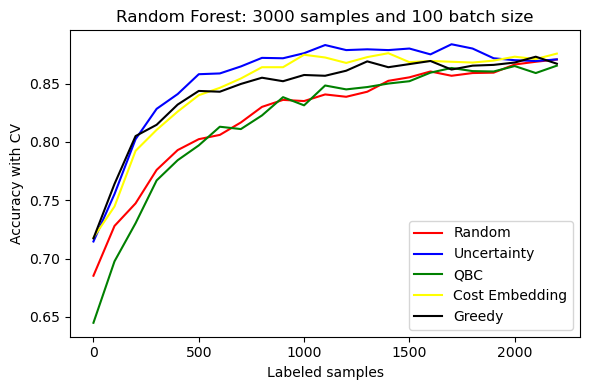

In [17]:
clf_name = 'Random Forest: 3000 samples and 100 batch size'
n_samples = 23
batch_size = 100
folds = 5
colors = ['blue', 'red', 'green']

fig, ax = plt.subplots(figsize=(6, 4))

clf = SklearnClassifier(RandomForestClassifier(criterion = 'entropy'), classes=np.unique(y_true))
cycle14, accuracies14 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_RandomSampling, n_samples, batch_size, clf)
ax.plot(cycle14, accuracies14, color = 'red', label = 'Random')

clf = SklearnClassifier(RandomForestClassifier(criterion = 'entropy'), classes=np.unique(y_true))
cycle24, accuracies24 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_UncertaintySampling, n_samples, batch_size, clf)
ax.plot(cycle24, accuracies24, color = 'blue', label = 'Uncertainty')

clf = SklearnClassifier(RandomForestClassifier(criterion = 'entropy'), classes=np.unique(y_true))
cycle34, accuracies34 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_QueryByCommittee, n_samples, batch_size, clf)
ax.plot(cycle34, accuracies34, color = 'green', label = 'QBC')

clf = SklearnClassifier(RandomForestClassifier(criterion = 'entropy'), classes=np.unique(y_true))
cycle44, accuracies44 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_CostEmbeddingAL, n_samples, batch_size, clf)
ax.plot(cycle44, accuracies44, color = 'yellow', label = 'Cost Embedding')

clf = SklearnClassifier(RandomForestClassifier(criterion = 'entropy'), classes=np.unique(y_true))
cycle54, accuracies54 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_GreedySamplingX, n_samples, batch_size, clf)
ax.plot(cycle54, accuracies54, color = 'black', label = 'Greedy')

ax.set(xlabel='Labeled samples', ylabel='Accuracy with CV', title=clf_name)
ax.legend()
plt.tight_layout()
plt.show()

In [18]:
# kolommen wegschrijven naar een file om deze bij te kunnen houden en ook achteraf te kunnen plotten.
f = open('rf_3000_100.txt', 'w')
for i, cycle in enumerate(cycle14):
    f.write(str(cycle) + ' ' + str(accuracies14[i]) + ' ' + str(accuracies24[i]) + ' ' + str(accuracies34[i]) + ' ' + str(accuracies44[i]) + ' ' + str(accuracies54[i]) + '\n')
f.close()

## For other batch sizes: batch size 60

### Decicion Tree

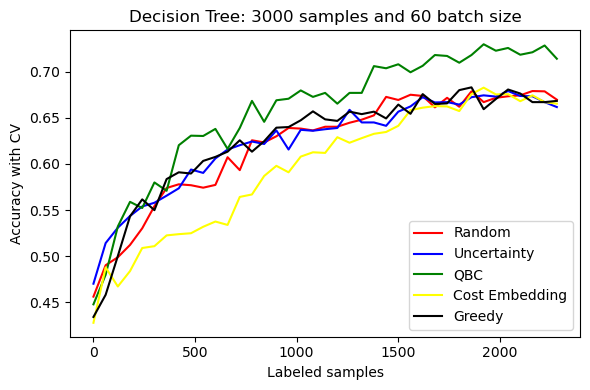

In [19]:
clf_name = 'Decision Tree: 3000 samples and 60 batch size'
# n_samples * batch_size can be maximal 4/5*(total size dataset) - batch_size if there is 5 fold cross validation
n_samples = 39
batch_size = 60
folds = 5
colors = ['blue', 'red', 'green']

fig, ax = plt.subplots(figsize=(6, 4))

clf = SklearnClassifier(DecisionTreeClassifier(criterion = 'entropy'), classes=np.unique(y_true))
cycle11, accuracies11 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_RandomSampling, n_samples, batch_size, clf)
ax.plot(cycle11, accuracies11, color = 'red', label = 'Random')

clf = SklearnClassifier(DecisionTreeClassifier(criterion = 'entropy'), classes=np.unique(y_true))
cycle21, accuracies21 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_UncertaintySampling, n_samples, batch_size, clf)
ax.plot(cycle21, accuracies21, color = 'blue', label = 'Uncertainty')

clf = SklearnClassifier(DecisionTreeClassifier(criterion = 'entropy'), classes=np.unique(y_true))
cycle31, accuracies31 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_QueryByCommittee, n_samples, batch_size, clf)
ax.plot(cycle31, accuracies31, color = 'green', label = 'QBC')

clf = SklearnClassifier(DecisionTreeClassifier(criterion = 'entropy'), classes=np.unique(y_true))
cycle41, accuracies41 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_CostEmbeddingAL, n_samples, batch_size, clf)
ax.plot(cycle41, accuracies41, color = 'yellow', label = 'Cost Embedding')

clf = SklearnClassifier(DecisionTreeClassifier(criterion = 'entropy'), classes=np.unique(y_true))
cycle51, accuracies51 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_GreedySamplingX, n_samples, batch_size, clf)
ax.plot(cycle51, accuracies51, color = 'black', label = 'Greedy')

ax.set(xlabel='Labeled samples', ylabel='Accuracy with CV', title=clf_name)
ax.legend()
plt.tight_layout()
plt.show()

In [20]:
# kolommen wegschrijven naar een file om deze bij te kunnen houden en ook achteraf te kunnen plotten.
f = open('dt_3000_60.txt', 'w')
for i, cycle in enumerate(cycle11):
    f.write(str(cycle) + ' ' + str(accuracies11[i]) + ' ' + str(accuracies21[i]) + ' ' + str(accuracies31[i]) + ' ' + str(accuracies41[i]) + ' ' + str(accuracies51[i]) + '\n')
f.close()

### SVM

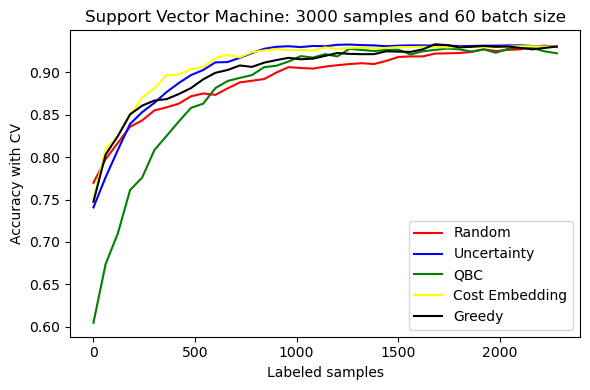

In [22]:
clf_name = 'Support Vector Machine: 3000 samples and 60 batch size'
n_samples = 39
batch_size = 60
folds = 5
colors = ['blue', 'red', 'green']

fig, ax = plt.subplots(figsize=(6, 4))

clf = SklearnClassifier(SVC(kernel = 'rbf', C = 10, probability = True), classes=np.unique(y_true))
cycle12, accuracies12 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_RandomSampling, n_samples, batch_size, clf)
ax.plot(cycle12, accuracies12, color = 'red', label = 'Random')

clf = SklearnClassifier(SVC(kernel = 'rbf', C = 10, probability = True), classes=np.unique(y_true))
cycle22, accuracies22 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_UncertaintySampling, n_samples, batch_size, clf)
ax.plot(cycle22, accuracies22, color = 'blue', label = 'Uncertainty')

clf = SklearnClassifier(SVC(kernel = 'rbf', C = 10, probability = True), classes=np.unique(y_true))
cycle32, accuracies32 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_QueryByCommittee, n_samples, batch_size, clf)
ax.plot(cycle32, accuracies32, color = 'green', label = 'QBC')

clf = SklearnClassifier(SVC(kernel = 'rbf', C = 10, probability = True), classes=np.unique(y_true))
cycle42, accuracies42 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_CostEmbeddingAL, n_samples, batch_size, clf)
ax.plot(cycle42, accuracies42, color = 'yellow', label = 'Cost Embedding')

clf = SklearnClassifier(SVC(kernel = 'rbf', C = 10, probability = True), classes=np.unique(y_true))
cycle52, accuracies52 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_GreedySamplingX, n_samples, batch_size, clf)
ax.plot(cycle52, accuracies52, color = 'black', label = 'Greedy')

ax.set(xlabel='Labeled samples', ylabel='Accuracy with CV', title=clf_name)
ax.legend()
plt.tight_layout()
plt.show()

In [23]:
# kolommen wegschrijven naar een file om deze bij te kunnen houden en ook achteraf te kunnen plotten.
f = open('svm_3000_60.txt', 'w')
for i, cycle in enumerate(cycle12):
    f.write(str(cycle) + ' ' + str(accuracies12[i]) + ' ' + str(accuracies22[i]) + ' ' + str(accuracies32[i]) + ' ' + str(accuracies42[i]) + ' ' + str(accuracies52[i]) + '\n')
f.close()

### Logistic Regression

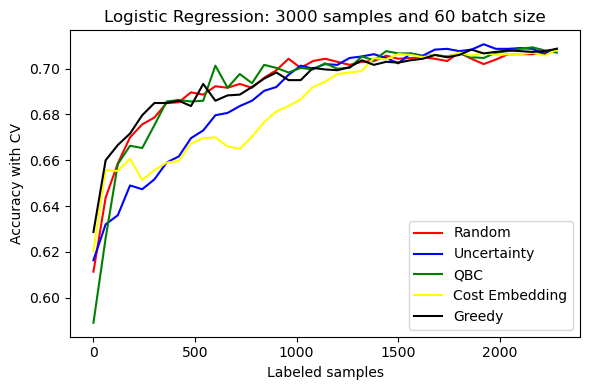

In [24]:
clf_name = 'Logistic Regression: 3000 samples and 60 batch size'
n_samples = 39
batch_size = 60
folds = 5
colors = ['blue', 'red', 'green']

fig, ax = plt.subplots(figsize=(6, 4))

clf = SklearnClassifier(LogisticRegression(), classes=np.unique(y_true))
cycle13, accuracies13 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_RandomSampling, n_samples, batch_size, clf)
ax.plot(cycle13, accuracies13, color = 'red', label = 'Random')

clf = SklearnClassifier(LogisticRegression(), classes=np.unique(y_true))
cycle23, accuracies23 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_UncertaintySampling, n_samples, batch_size, clf)
ax.plot(cycle23, accuracies23, color = 'blue', label = 'Uncertainty')

clf = SklearnClassifier(LogisticRegression(), classes=np.unique(y_true))
cycle33, accuracies33 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_QueryByCommittee, n_samples, batch_size, clf)
ax.plot(cycle33, accuracies33, color = 'green', label = 'QBC')

clf = SklearnClassifier(LogisticRegression(), classes=np.unique(y_true))
cycle43, accuracies43 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_CostEmbeddingAL, n_samples, batch_size, clf)
ax.plot(cycle43, accuracies43, color = 'yellow', label = 'Cost Embedding')

clf = SklearnClassifier(LogisticRegression(), classes=np.unique(y_true))
cycle53, accuracies53 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_GreedySamplingX, n_samples, batch_size, clf)
ax.plot(cycle53, accuracies53, color = 'black', label = 'Greedy')

ax.set(xlabel='Labeled samples', ylabel='Accuracy with CV', title=clf_name)
ax.legend()
plt.tight_layout()
plt.show()

In [25]:
# kolommen wegschrijven naar een file om deze bij te kunnen houden en ook achteraf te kunnen plotten.
f = open('lr_3000_60.txt', 'w')
for i, cycle in enumerate(cycle13):
    f.write(str(cycle) + ' ' + str(accuracies13[i]) + ' ' + str(accuracies23[i]) + ' ' + str(accuracies33[i]) + ' ' + str(accuracies43[i]) + ' ' + str(accuracies53[i]) + '\n')
f.close()

### Random Forest Classifier

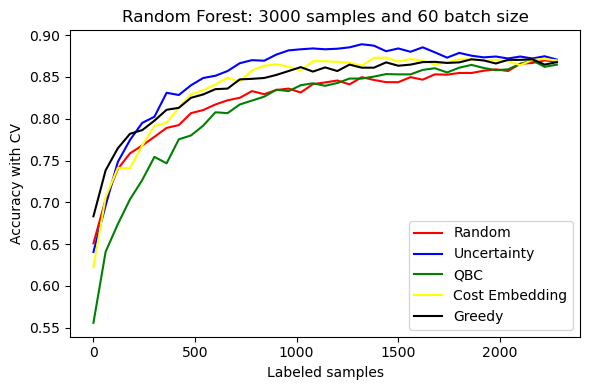

In [26]:
clf_name = 'Random Forest: 3000 samples and 60 batch size'
n_samples = 39
batch_size = 60
folds = 5
colors = ['blue', 'red', 'green']

fig, ax = plt.subplots(figsize=(6, 4))

clf = SklearnClassifier(RandomForestClassifier(criterion = 'entropy'), classes=np.unique(y_true))
cycle14, accuracies14 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_RandomSampling, n_samples, batch_size, clf)
ax.plot(cycle14, accuracies14, color = 'red', label = 'Random')

clf = SklearnClassifier(RandomForestClassifier(criterion = 'entropy'), classes=np.unique(y_true))
cycle24, accuracies24 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_UncertaintySampling, n_samples, batch_size, clf)
ax.plot(cycle24, accuracies24, color = 'blue', label = 'Uncertainty')

clf = SklearnClassifier(RandomForestClassifier(criterion = 'entropy'), classes=np.unique(y_true))
cycle34, accuracies34 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_QueryByCommittee, n_samples, batch_size, clf)
ax.plot(cycle34, accuracies34, color = 'green', label = 'QBC')

clf = SklearnClassifier(RandomForestClassifier(criterion = 'entropy'), classes=np.unique(y_true))
cycle44, accuracies44 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_CostEmbeddingAL, n_samples, batch_size, clf)
ax.plot(cycle44, accuracies44, color = 'yellow', label = 'Cost Embedding')

clf = SklearnClassifier(RandomForestClassifier(criterion = 'entropy'), classes=np.unique(y_true))
cycle54, accuracies54 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_GreedySamplingX, n_samples, batch_size, clf)
ax.plot(cycle54, accuracies54, color = 'black', label = 'Greedy')

ax.set(xlabel='Labeled samples', ylabel='Accuracy with CV', title=clf_name)
ax.legend()
plt.tight_layout()
plt.show()

In [27]:
# kolommen wegschrijven naar een file om deze bij te kunnen houden en ook achteraf te kunnen plotten.
f = open('rf_3000_60.txt', 'w')
for i, cycle in enumerate(cycle14):
    f.write(str(cycle) + ' ' + str(accuracies14[i]) + ' ' + str(accuracies24[i]) + ' ' + str(accuracies34[i]) + ' ' + str(accuracies44[i]) + ' ' + str(accuracies54[i]) + '\n')
f.close()

## For other batch sizes: batch size 150

### Decicion Tree

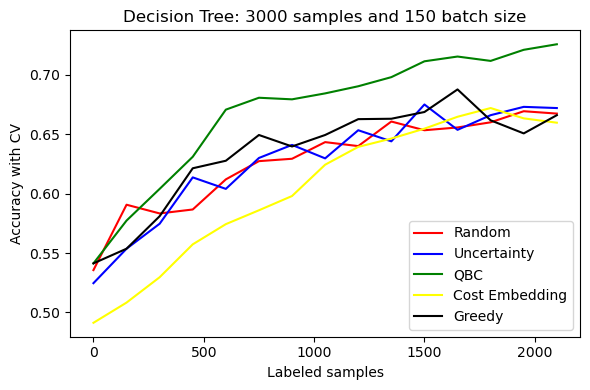

In [28]:
clf_name = 'Decision Tree: 3000 samples and 150 batch size'
# n_samples * batch_size can be maximal 4/5*(total size dataset) - batch_size if there is 5 fold cross validation
n_samples = 15
batch_size = 150
folds = 5
colors = ['blue', 'red', 'green']

fig, ax = plt.subplots(figsize=(6, 4))

clf = SklearnClassifier(DecisionTreeClassifier(criterion = 'entropy'), classes=np.unique(y_true))
cycle11, accuracies11 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_RandomSampling, n_samples, batch_size, clf)
ax.plot(cycle11, accuracies11, color = 'red', label = 'Random')

clf = SklearnClassifier(DecisionTreeClassifier(criterion = 'entropy'), classes=np.unique(y_true))
cycle21, accuracies21 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_UncertaintySampling, n_samples, batch_size, clf)
ax.plot(cycle21, accuracies21, color = 'blue', label = 'Uncertainty')

clf = SklearnClassifier(DecisionTreeClassifier(criterion = 'entropy'), classes=np.unique(y_true))
cycle31, accuracies31 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_QueryByCommittee, n_samples, batch_size, clf)
ax.plot(cycle31, accuracies31, color = 'green', label = 'QBC')

clf = SklearnClassifier(DecisionTreeClassifier(criterion = 'entropy'), classes=np.unique(y_true))
cycle41, accuracies41 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_CostEmbeddingAL, n_samples, batch_size, clf)
ax.plot(cycle41, accuracies41, color = 'yellow', label = 'Cost Embedding')

clf = SklearnClassifier(DecisionTreeClassifier(criterion = 'entropy'), classes=np.unique(y_true))
cycle51, accuracies51 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_GreedySamplingX, n_samples, batch_size, clf)
ax.plot(cycle51, accuracies51, color = 'black', label = 'Greedy')

ax.set(xlabel='Labeled samples', ylabel='Accuracy with CV', title=clf_name)
ax.legend()
plt.tight_layout()
plt.show()

In [29]:
# kolommen wegschrijven naar een file om deze bij te kunnen houden en ook achteraf te kunnen plotten.
f = open('dt_3000_150.txt', 'w')
for i, cycle in enumerate(cycle11):
    f.write(str(cycle) + ' ' + str(accuracies11[i]) + ' ' + str(accuracies21[i]) + ' ' + str(accuracies31[i]) + ' ' + str(accuracies41[i]) + ' ' + str(accuracies51[i]) + '\n')
f.close()

### SVM

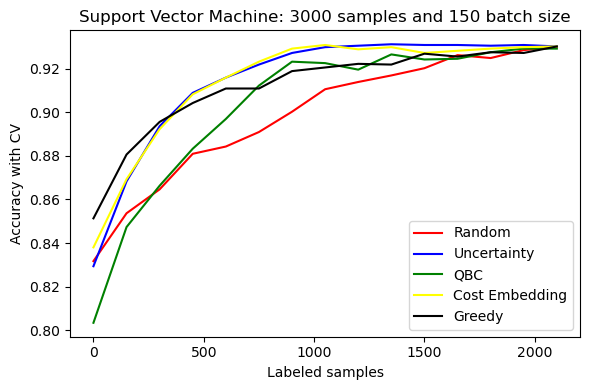

In [30]:
clf_name = 'Support Vector Machine: 3000 samples and 150 batch size'
n_samples = 15
batch_size = 150
folds = 5
colors = ['blue', 'red', 'green']

fig, ax = plt.subplots(figsize=(6, 4))

clf = SklearnClassifier(SVC(kernel = 'rbf', C = 10, probability = True), classes=np.unique(y_true))
cycle12, accuracies12 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_RandomSampling, n_samples, batch_size, clf)
ax.plot(cycle12, accuracies12, color = 'red', label = 'Random')

clf = SklearnClassifier(SVC(kernel = 'rbf', C = 10, probability = True), classes=np.unique(y_true))
cycle22, accuracies22 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_UncertaintySampling, n_samples, batch_size, clf)
ax.plot(cycle22, accuracies22, color = 'blue', label = 'Uncertainty')

clf = SklearnClassifier(SVC(kernel = 'rbf', C = 10, probability = True), classes=np.unique(y_true))
cycle32, accuracies32 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_QueryByCommittee, n_samples, batch_size, clf)
ax.plot(cycle32, accuracies32, color = 'green', label = 'QBC')

clf = SklearnClassifier(SVC(kernel = 'rbf', C = 10, probability = True), classes=np.unique(y_true))
cycle42, accuracies42 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_CostEmbeddingAL, n_samples, batch_size, clf)
ax.plot(cycle42, accuracies42, color = 'yellow', label = 'Cost Embedding')

clf = SklearnClassifier(SVC(kernel = 'rbf', C = 10, probability = True), classes=np.unique(y_true))
cycle52, accuracies52 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_GreedySamplingX, n_samples, batch_size, clf)
ax.plot(cycle52, accuracies52, color = 'black', label = 'Greedy')

ax.set(xlabel='Labeled samples', ylabel='Accuracy with CV', title=clf_name)
ax.legend()
plt.tight_layout()
plt.show()

In [31]:
# kolommen wegschrijven naar een file om deze bij te kunnen houden en ook achteraf te kunnen plotten.
f = open('svm_3000_150.txt', 'w')
for i, cycle in enumerate(cycle12):
    f.write(str(cycle) + ' ' + str(accuracies12[i]) + ' ' + str(accuracies22[i]) + ' ' + str(accuracies32[i]) + ' ' + str(accuracies42[i]) + ' ' + str(accuracies52[i]) + '\n')
f.close()

### Logistic Regression

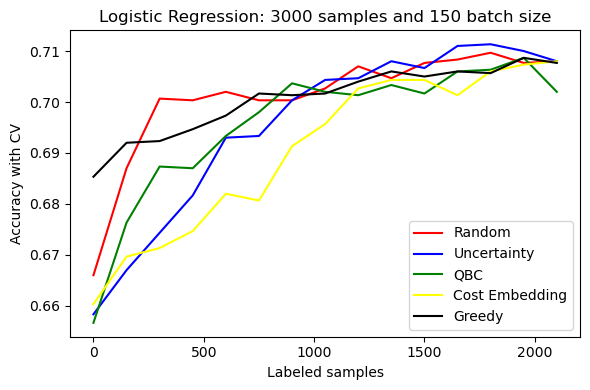

In [32]:
clf_name = 'Logistic Regression: 3000 samples and 150 batch size'
n_samples = 15
batch_size = 150
folds = 5
colors = ['blue', 'red', 'green']

fig, ax = plt.subplots(figsize=(6, 4))

clf = SklearnClassifier(LogisticRegression(), classes=np.unique(y_true))
cycle13, accuracies13 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_RandomSampling, n_samples, batch_size, clf)
ax.plot(cycle13, accuracies13, color = 'red', label = 'Random')

clf = SklearnClassifier(LogisticRegression(), classes=np.unique(y_true))
cycle23, accuracies23 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_UncertaintySampling, n_samples, batch_size, clf)
ax.plot(cycle23, accuracies23, color = 'blue', label = 'Uncertainty')

clf = SklearnClassifier(LogisticRegression(), classes=np.unique(y_true))
cycle33, accuracies33 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_QueryByCommittee, n_samples, batch_size, clf)
ax.plot(cycle33, accuracies33, color = 'green', label = 'QBC')

clf = SklearnClassifier(LogisticRegression(), classes=np.unique(y_true))
cycle43, accuracies43 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_CostEmbeddingAL, n_samples, batch_size, clf)
ax.plot(cycle43, accuracies43, color = 'yellow', label = 'Cost Embedding')

clf = SklearnClassifier(LogisticRegression(), classes=np.unique(y_true))
cycle53, accuracies53 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_GreedySamplingX, n_samples, batch_size, clf)
ax.plot(cycle53, accuracies53, color = 'black', label = 'Greedy')

ax.set(xlabel='Labeled samples', ylabel='Accuracy with CV', title=clf_name)
ax.legend()
plt.tight_layout()
plt.show()

In [33]:
# kolommen wegschrijven naar een file om deze bij te kunnen houden en ook achteraf te kunnen plotten.
f = open('lr_3000_150.txt', 'w')
for i, cycle in enumerate(cycle13):
    f.write(str(cycle) + ' ' + str(accuracies13[i]) + ' ' + str(accuracies23[i]) + ' ' + str(accuracies33[i]) + ' ' + str(accuracies43[i]) + ' ' + str(accuracies53[i]) + '\n')
f.close()

### Random Forest Classifier

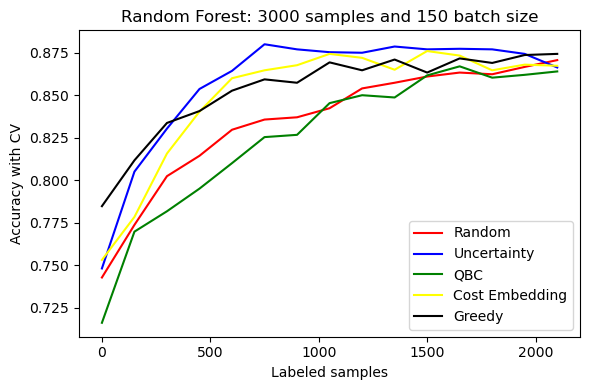

In [34]:
clf_name = 'Random Forest: 3000 samples and 150 batch size'
n_samples = 15
batch_size = 150
folds = 5
colors = ['blue', 'red', 'green']

fig, ax = plt.subplots(figsize=(6, 4))

clf = SklearnClassifier(RandomForestClassifier(criterion = 'entropy'), classes=np.unique(y_true))
cycle14, accuracies14 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_RandomSampling, n_samples, batch_size, clf)
ax.plot(cycle14, accuracies14, color = 'red', label = 'Random')

clf = SklearnClassifier(RandomForestClassifier(criterion = 'entropy'), classes=np.unique(y_true))
cycle24, accuracies24 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_UncertaintySampling, n_samples, batch_size, clf)
ax.plot(cycle24, accuracies24, color = 'blue', label = 'Uncertainty')

clf = SklearnClassifier(RandomForestClassifier(criterion = 'entropy'), classes=np.unique(y_true))
cycle34, accuracies34 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_QueryByCommittee, n_samples, batch_size, clf)
ax.plot(cycle34, accuracies34, color = 'green', label = 'QBC')

clf = SklearnClassifier(RandomForestClassifier(criterion = 'entropy'), classes=np.unique(y_true))
cycle44, accuracies44 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_CostEmbeddingAL, n_samples, batch_size, clf)
ax.plot(cycle44, accuracies44, color = 'yellow', label = 'Cost Embedding')

clf = SklearnClassifier(RandomForestClassifier(criterion = 'entropy'), classes=np.unique(y_true))
cycle54, accuracies54 = ActiveLearning_CrossValidation(X, y_true, folds, ActiveLearning_GreedySamplingX, n_samples, batch_size, clf)
ax.plot(cycle54, accuracies54, color = 'black', label = 'Greedy')

ax.set(xlabel='Labeled samples', ylabel='Accuracy with CV', title=clf_name)
ax.legend()
plt.tight_layout()
plt.show()

In [35]:
# kolommen wegschrijven naar een file om deze bij te kunnen houden en ook achteraf te kunnen plotten.
f = open('rf_3000_150.txt', 'w')
for i, cycle in enumerate(cycle14):
    f.write(str(cycle) + ' ' + str(accuracies14[i]) + ' ' + str(accuracies24[i]) + ' ' + str(accuracies34[i]) + ' ' + str(accuracies44[i]) + ' ' + str(accuracies54[i]) + '\n')
f.close()

## Comparing the batch size results for each classifier

In [49]:
def plot_different_batch_sizes(c1, c2, c3, acc60, acc100, acc150, query_name, amount_samples, clf_name):
    plt.figure(figsize=(6,4))
    plt.plot(c1, acc60, color = 'red', label = '60')
    plt.plot(c2, acc100, color = 'green', label = '100')
    plt.plot(c3, acc150, color = 'blue', label = '150')
    plt.xlabel('Labeled samples')
    plt.ylabel('Accuracy with CV')
    plt.title(query_name+' with '+clf_name+' for different batch sizes: '+str(amount_samples)+' samples')
    plt.legend()
    plt.show()

### Decision Tree

In [50]:
c1, ac1_60, ac2_60, ac3_60, ac4_60, ac5_60 = np.loadtxt('dt_3000_60.txt', unpack = True)
c2, ac1_100, ac2_100, ac3_100, ac4_100, ac5_100 = np.loadtxt('dt_3000_100.txt', unpack = True)
c3, ac1_150, ac2_150, ac3_150, ac4_150, ac5_150 = np.loadtxt('dt_3000_150.txt', unpack = True)

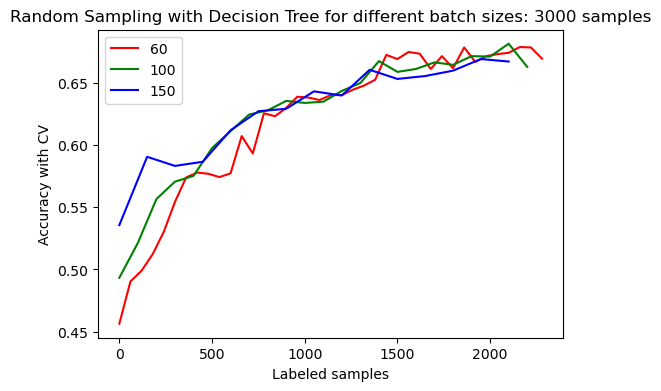

In [51]:
plot_different_batch_sizes(c1, c2, c3, ac1_60, ac1_100, ac1_150, 'Random Sampling', 3000, 'Decision Tree')

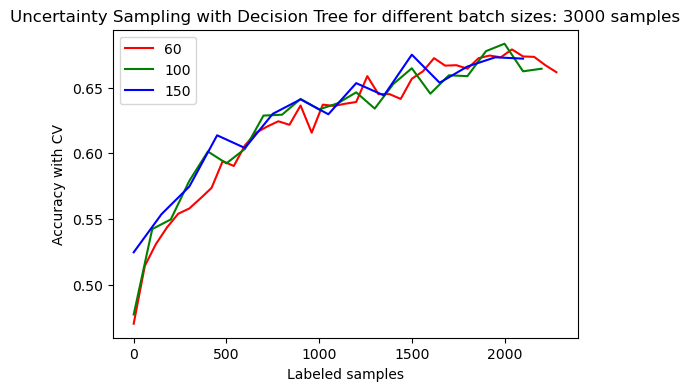

In [52]:
plot_different_batch_sizes(c1, c2, c3, ac2_60, ac2_100, ac2_150, 'Uncertainty Sampling', 3000, 'Decision Tree')

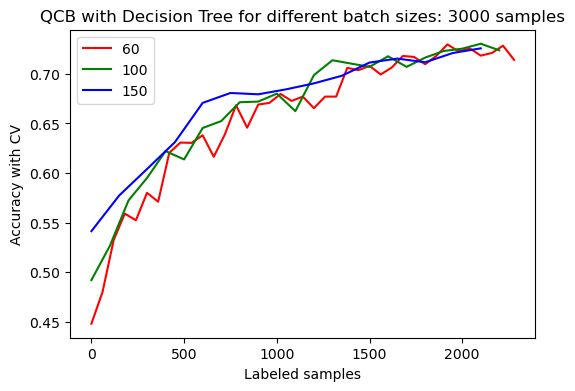

In [53]:
plot_different_batch_sizes(c1, c2, c3, ac3_60, ac3_100, ac3_150, 'QCB', 3000, 'Decision Tree')

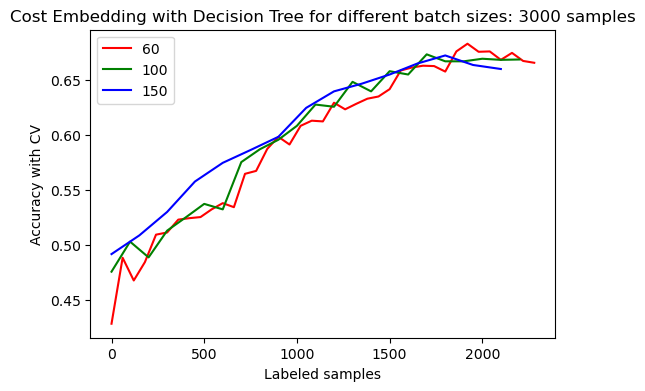

In [54]:
plot_different_batch_sizes(c1, c2, c3, ac4_60, ac4_100, ac4_150, 'Cost Embedding', 3000, 'Decision Tree')

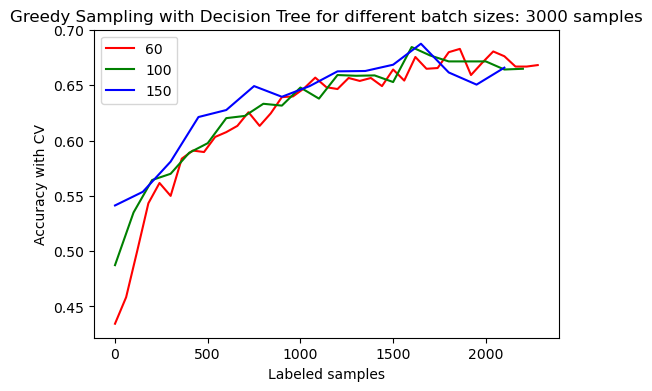

In [55]:
plot_different_batch_sizes(c1, c2, c3, ac5_60, ac5_100, ac5_150, 'Greedy Sampling', 3000, 'Decision Tree')

### SVM

In [56]:
c1, ac1_60, ac2_60, ac3_60, ac4_60, ac5_60 = np.loadtxt('svm_3000_60.txt', unpack = True)
c2, ac1_100, ac2_100, ac3_100, ac4_100, ac5_100 = np.loadtxt('svm_3000_100.txt', unpack = True)
c3, ac1_150, ac2_150, ac3_150, ac4_150, ac5_150 = np.loadtxt('svm_3000_150.txt', unpack = True)

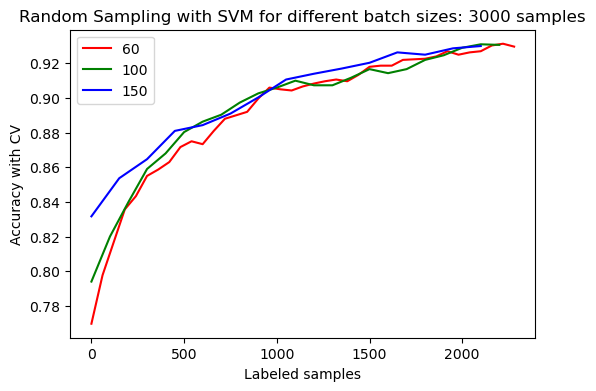

In [57]:
plot_different_batch_sizes(c1, c2, c3, ac1_60, ac1_100, ac1_150, 'Random Sampling', 3000, 'SVM')

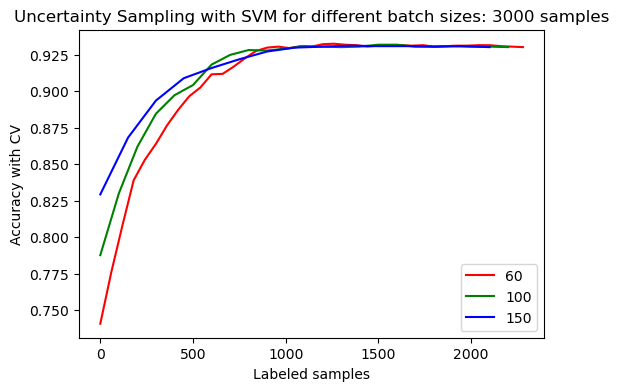

In [58]:
plot_different_batch_sizes(c1, c2, c3, ac2_60, ac2_100, ac2_150, 'Uncertainty Sampling', 3000, 'SVM')

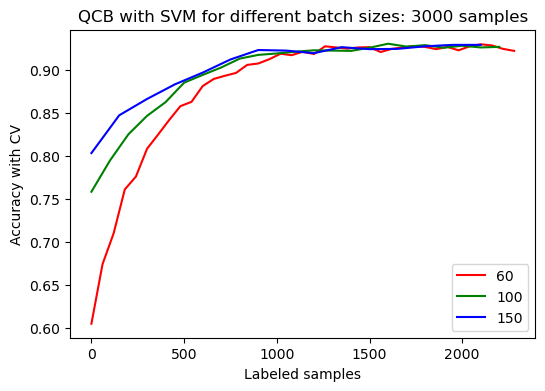

In [59]:
plot_different_batch_sizes(c1, c2, c3, ac3_60, ac3_100, ac3_150, 'QCB', 3000, 'SVM')

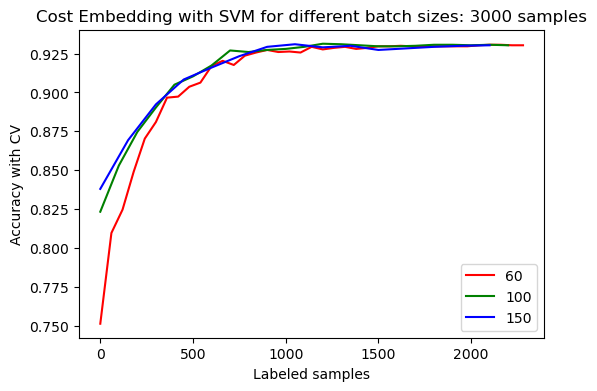

In [60]:
plot_different_batch_sizes(c1, c2, c3, ac4_60, ac4_100, ac4_150, 'Cost Embedding', 3000, 'SVM')

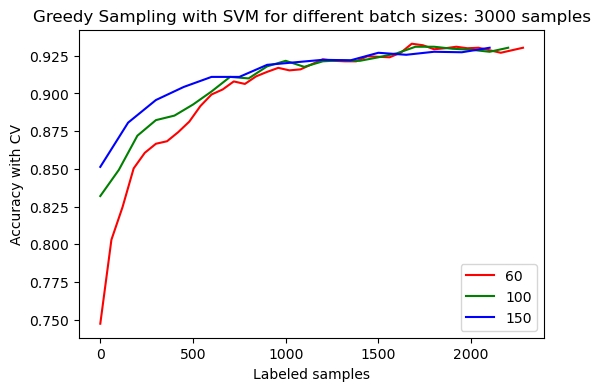

In [61]:
plot_different_batch_sizes(c1, c2, c3, ac5_60, ac5_100, ac5_150, 'Greedy Sampling', 3000, 'SVM')

### Logistic Regression

In [62]:
c1, ac1_60, ac2_60, ac3_60, ac4_60, ac5_60 = np.loadtxt('lr_3000_60.txt', unpack = True)
c2, ac1_100, ac2_100, ac3_100, ac4_100, ac5_100 = np.loadtxt('lr_3000_100.txt', unpack = True)
c3, ac1_150, ac2_150, ac3_150, ac4_150, ac5_150 = np.loadtxt('lr_3000_150.txt', unpack = True)

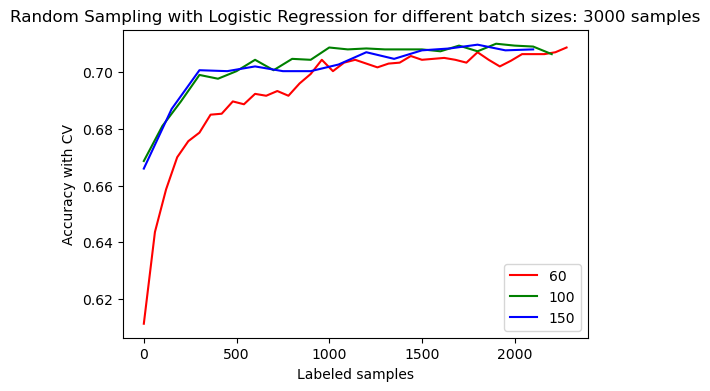

In [63]:
plot_different_batch_sizes(c1, c2, c3, ac1_60, ac1_100, ac1_150, 'Random Sampling', 3000, 'Logistic Regression')

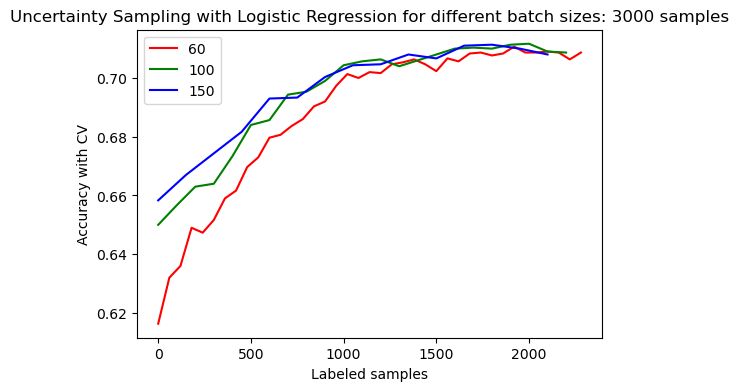

In [64]:
plot_different_batch_sizes(c1, c2, c3, ac2_60, ac2_100, ac2_150, 'Uncertainty Sampling', 3000, 'Logistic Regression')

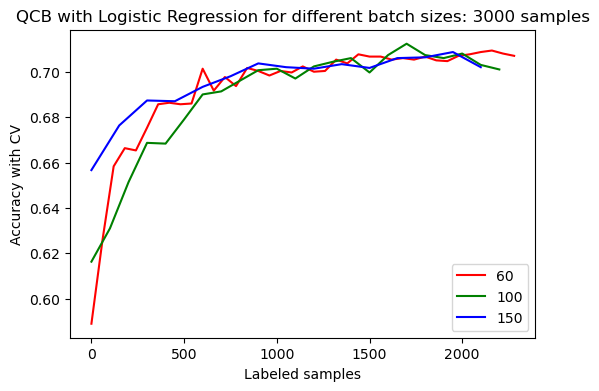

In [65]:
plot_different_batch_sizes(c1, c2, c3, ac3_60, ac3_100, ac3_150, 'QCB', 3000, 'Logistic Regression')

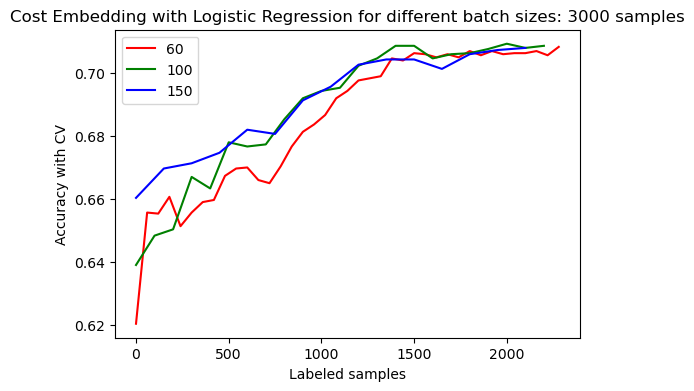

In [66]:
plot_different_batch_sizes(c1, c2, c3, ac4_60, ac4_100, ac4_150, 'Cost Embedding', 3000, 'Logistic Regression')

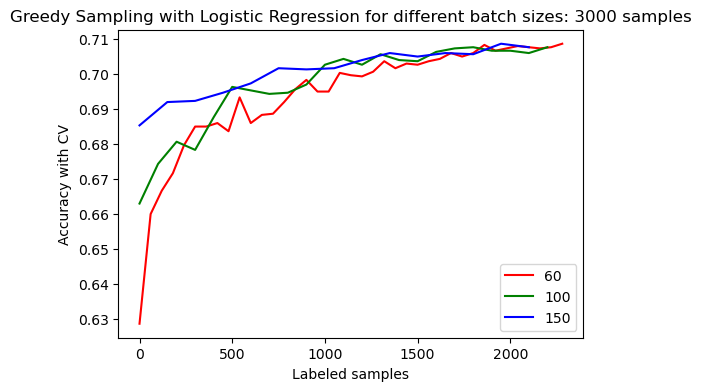

In [67]:
plot_different_batch_sizes(c1, c2, c3, ac5_60, ac5_100, ac5_150, 'Greedy Sampling', 3000, 'Logistic Regression')

### Random Forest Classifier

In [68]:
c1, ac1_60, ac2_60, ac3_60, ac4_60, ac5_60 = np.loadtxt('rf_3000_60.txt', unpack = True)
c2, ac1_100, ac2_100, ac3_100, ac4_100, ac5_100 = np.loadtxt('rf_3000_100.txt', unpack = True)
c3, ac1_150, ac2_150, ac3_150, ac4_150, ac5_150 = np.loadtxt('rf_3000_150.txt', unpack = True)

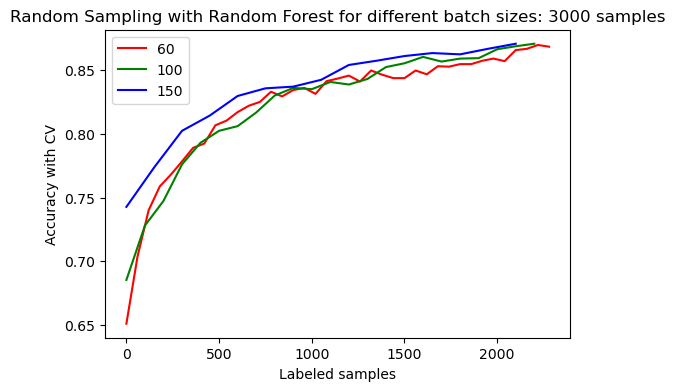

In [69]:
plot_different_batch_sizes(c1, c2, c3, ac1_60, ac1_100, ac1_150, 'Random Sampling', 3000, 'Random Forest')

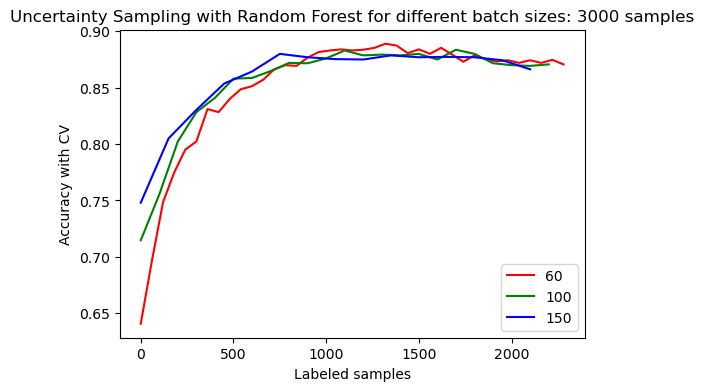

In [70]:
plot_different_batch_sizes(c1, c2, c3, ac2_60, ac2_100, ac2_150, 'Uncertainty Sampling', 3000, 'Random Forest')

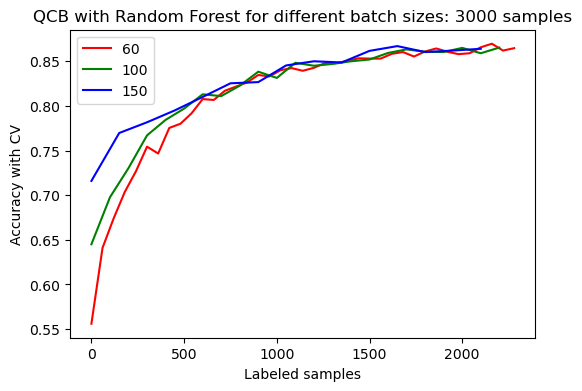

In [71]:
plot_different_batch_sizes(c1, c2, c3, ac3_60, ac3_100, ac3_150, 'QCB', 3000, 'Random Forest')

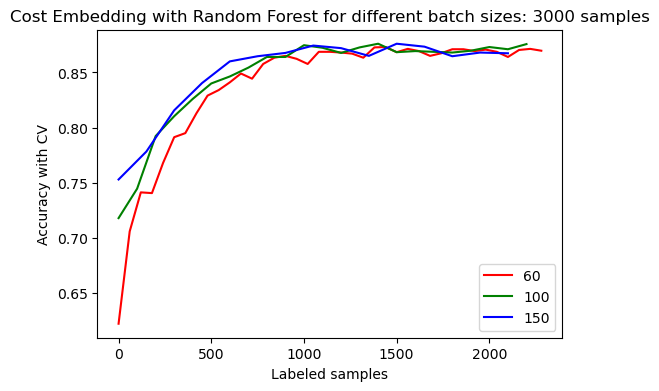

In [72]:
plot_different_batch_sizes(c1, c2, c3, ac4_60, ac4_100, ac4_150, 'Cost Embedding', 3000, 'Random Forest')

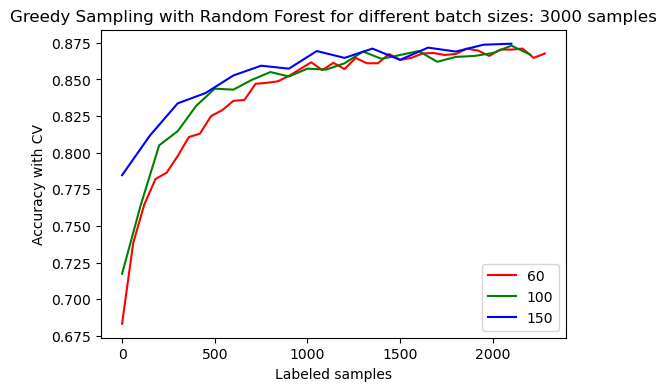

In [73]:
plot_different_batch_sizes(c1, c2, c3, ac5_60, ac5_100, ac5_150, 'Greedy Sampling', 3000, 'Random Forest')